In [199]:
import pandas as pd 
import matplotlib.pyplot as plt

#Regression
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Libraries for K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Libraries for Text Analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer




In [200]:
# Read the CSV file
data = pd.read_csv("World University Rankings 2023.csv")

data2 = pd.read_csv("University_Times_2023.csv")

# Merging the datasets using an inner join, adjusting for the column names

merged_data = pd.merge(data, data2, left_on="Name of University", right_on="name", how="inner")

# Display the first few rows of the merged dataset
merged_data = merged_data.head(1000)



In [201]:
# Extracting the specified columns from the merged dataset
data = merged_data[["University Rank", "Name of University", "Location", 
                                            "No of student", "No of student per staff", 
                                            "International Student", "Female:Male Ratio", 
                                            "OverAll Score", "Teaching Score", "Research Score", 
                                            "Citations Score", "Industry Income Score", 
                                            "International Outlook Score", "subjects_offered", 
                                            "closed", "unaccredited"]]

result=data

result = pd.DataFrame(result)



In [202]:
result[['Female Ratio', 'Male Ratio']] = result['Female:Male Ratio'].str.split(' : ', expand=True)

#Converting Relevant Columns to float types
result['Female Students (%)'] = result['Female Ratio'].str.strip().astype(float)
result['Male Students (%)'] = result['Male Ratio'].str.strip().astype(float)
result['No of student'] = result['No of student'].str.replace(',','').str.strip().astype(float)

# Convert the "subjects_offered" column to string
result['subjects_offered'] = result['subjects_offered'].astype(str)
# Split the 'subjects_offered' column into individual subjects
result['subjects_offered'] = result['subjects_offered'].str.split(',')
# Convert the "International Student" column to numeric
result['International Student'] = pd.to_numeric(result['International Student'].str.replace('%', '').str.strip(), errors='coerce')

# Remove rows with NaN values in the "International Student" column
result.dropna(subset=['International Student'], inplace=True)

result.dtypes


University Rank                 object
Name of University              object
Location                        object
No of student                  float64
No of student per staff        float64
International Student          float64
Female:Male Ratio               object
OverAll Score                   object
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
subjects_offered                object
closed                            bool
unaccredited                      bool
Female Ratio                    object
Male Ratio                      object
Female Students (%)            float64
Male Students (%)              float64
dtype: object

In [203]:

result['Female Student (Approx)'] = (result['No of student'] * (result['Female Students (%)'] / 100)).round()
result['Male Student (Approx)'] = (result['No of student'] * (result['Male Students (%)'] / 100)).round()
result['International Student (Approx)'] = (result['No of student'] * (result['International Student'] / 100)).round()



universities_data = result

universities_data.dtypes


University Rank                    object
Name of University                 object
Location                           object
No of student                     float64
No of student per staff           float64
International Student             float64
Female:Male Ratio                  object
OverAll Score                      object
Teaching Score                    float64
Research Score                    float64
Citations Score                   float64
Industry Income Score             float64
International Outlook Score       float64
subjects_offered                   object
closed                               bool
unaccredited                         bool
Female Ratio                       object
Male Ratio                         object
Female Students (%)               float64
Male Students (%)                 float64
Female Student (Approx)           float64
Male Student (Approx)             float64
International Student (Approx)    float64
dtype: object

In [204]:
#Filtering based on the United Kingdom and the United States

locations = ['United Kingdom','United States']

uk_us_data = result[result['Location'].isin(locations)]

uk_us_data.count

<bound method DataFrame.count of     University Rank                     Name of University        Location  \
0                 1                   University of Oxford  United Kingdom   
1                 2                     Harvard University   United States   
2                 3                University of Cambridge  United Kingdom   
3                 3                    Stanford University   United States   
4                 5  Massachusetts Institute of Technology   United States   
..              ...                                    ...             ...   
976       1001–1200         Bowling Green State University   United States   
980       1001–1200        Cardiff Metropolitan University  United Kingdom   
985       1001–1200       University of Central Lancashire  United Kingdom   
994       1001–1200                    Clarkson University   United States   
996       1001–1200                   Creighton University   United States   

     No of student  No of stud

In [205]:
# Descriptive Statistics

# Summary statistics for key columns
summary_statistics = uk_us_data[['OverAll Score', 'Teaching Score', 'Research Score', 
                                'Citations Score', 'Industry Income Score', 'International Outlook Score']].describe()

# Count of universities by location (UK vs. US)
university_counts_by_location = uk_us_data['Location'].value_counts()

summary_statistics, university_counts_by_location


(       Teaching Score  Research Score  Citations Score  Industry Income Score  \
 count      237.000000      237.000000       237.000000             237.000000   
 mean        38.805063       35.824051        73.101266              44.982700   
 std         18.926568       22.877418        18.720888              11.784484   
 min         15.700000       10.600000        29.300000              36.900000   
 25%         24.900000       19.500000        59.300000              37.600000   
 50%         34.000000       27.600000        74.500000              40.200000   
 75%         45.800000       41.700000        90.100000              47.100000   
 max         94.800000       99.700000        99.900000              99.600000   
 
        International Outlook Score  
 count                   237.000000  
 mean                     62.456540  
 std                      21.332237  
 min                      22.100000  
 25%                      43.700000  
 50%                      60.300

In [206]:
# Calculate mean values for key columns for UK and US individually
mean_uk = uk_us_data[uk_us_data['Location'] == 'United Kingdom'][['OverAll Score', 'Teaching Score', 'Research Score', 
                                                                 'Citations Score', 'Industry Income Score', 'International Outlook Score']].mean()

mean_us = uk_us_data[uk_us_data['Location'] == 'United States'][['OverAll Score', 'Teaching Score', 'Research Score', 
                                                                'Citations Score', 'Industry Income Score', 'International Outlook Score']].mean()



print("Means for UK:",mean_uk,'\n', "Means for")


mean_us


Means for UK: Teaching Score                 29.54000
Research Score                 30.62000
Citations Score                74.41000
Industry Income Score          40.16125
International Outlook Score    84.45375
dtype: float64 
 Means for


C:\Users\thoma\AppData\Local\Temp\ipykernel_12944\3655739963.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Citations Score', 'Industry Income Score', 'International Outlook Score']].mean()
C:\Users\thoma\AppData\Local\Temp\ipykernel_12944\3655739963.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Citations Score', 'Industry Income Score', 'International Outlook Score']].mean()


Teaching Score                 43.526115
Research Score                 38.475796
Citations Score                72.434395
Industry Income Score          47.439490
International Outlook Score    51.247771
dtype: float64

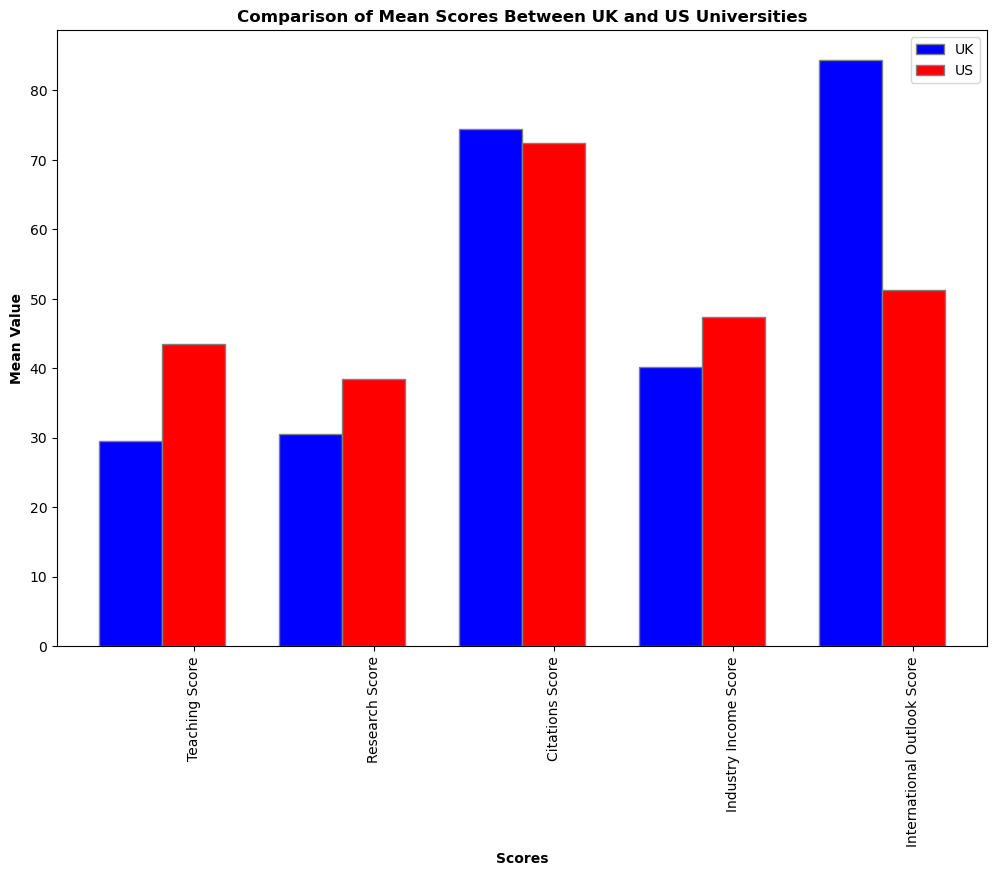

In [207]:
# Data for plotting
labels = mean_uk.index
uk_means = mean_uk.values
us_means = mean_us.values

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the bar chart
bar_width = 0.35
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Create bars
plt.bar(r1, uk_means, width=bar_width, color='b', edgecolor='grey', label='UK')
plt.bar(r2, us_means, width=bar_width, color='r', edgecolor='grey', label='US')

# Title & Subtitle
plt.title('Comparison of Mean Scores Between UK and US Universities', fontweight='bold')
plt.xlabel('Scores', fontweight='bold')
plt.ylabel('Mean Value', fontweight='bold')

# X axis
plt.xticks([r + bar_width for r in range(len(uk_means))], labels,rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()


The blue bars represent UK universities, while the red bars represent US universities.
It's evident from the chart that US universities have higher mean scores in "Overall", "Teaching", "Research", and "Industry Income" categories.
UK universities have a significantly higher mean score in the "International Outlook" category compared to US universities.
The "Citations Score" is relatively close between the two, with UK universities having a slightly higher mean.


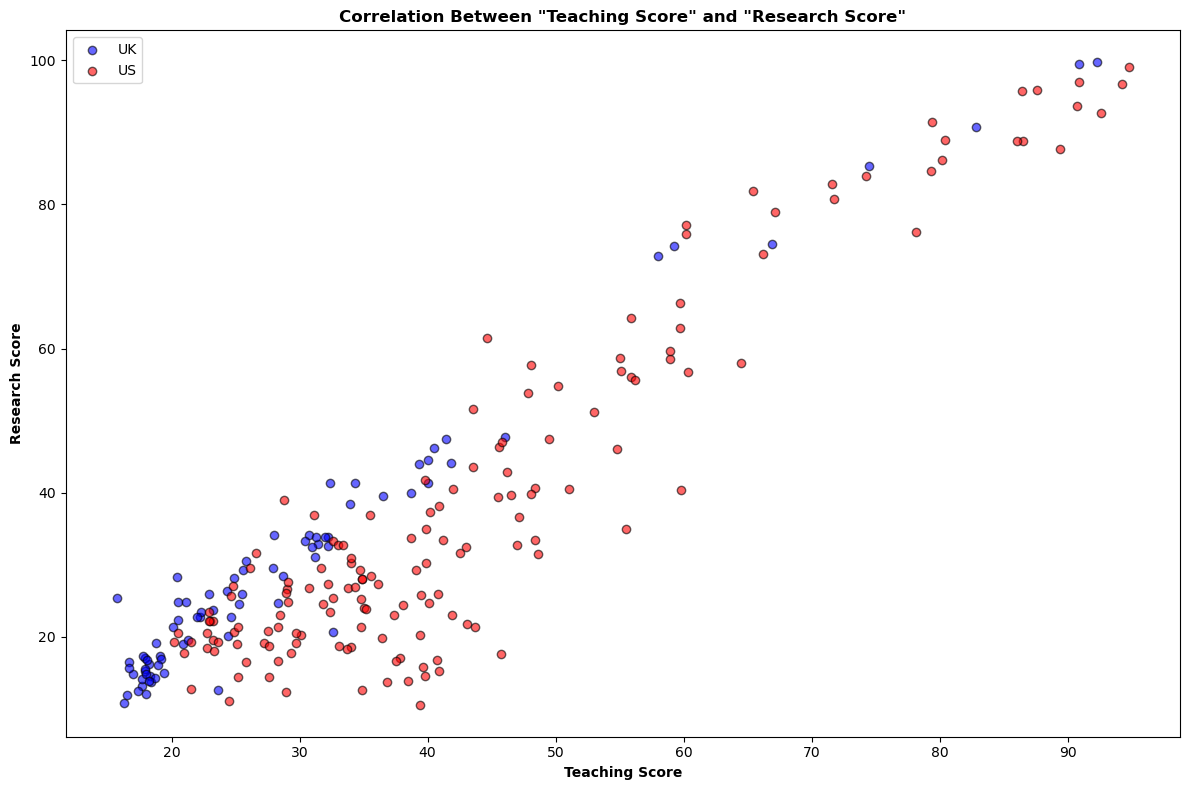

In [208]:
# Set up the figure and axes for the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the scatter plot for Teaching Score vs. Research Score
# Differentiating the points by location (UK or US)
uk_points = uk_us_data[uk_us_data['Location'] == 'United Kingdom']
us_points = uk_us_data[uk_us_data['Location'] == 'United States']

ax.scatter(uk_points['Teaching Score'], uk_points['Research Score'], color='b', alpha=0.6, label='UK', edgecolor='black')
ax.scatter(us_points['Teaching Score'], us_points['Research Score'], color='r', alpha=0.6, label='US', edgecolor='black')

# Title, labels, and legend
ax.set_title('Correlation Between "Teaching Score" and "Research Score"', fontweight='bold')
ax.set_xlabel('Teaching Score', fontweight='bold')
ax.set_ylabel('Research Score', fontweight='bold')
ax.legend()

# Display the scatter plot
plt.tight_layout()
plt.show()


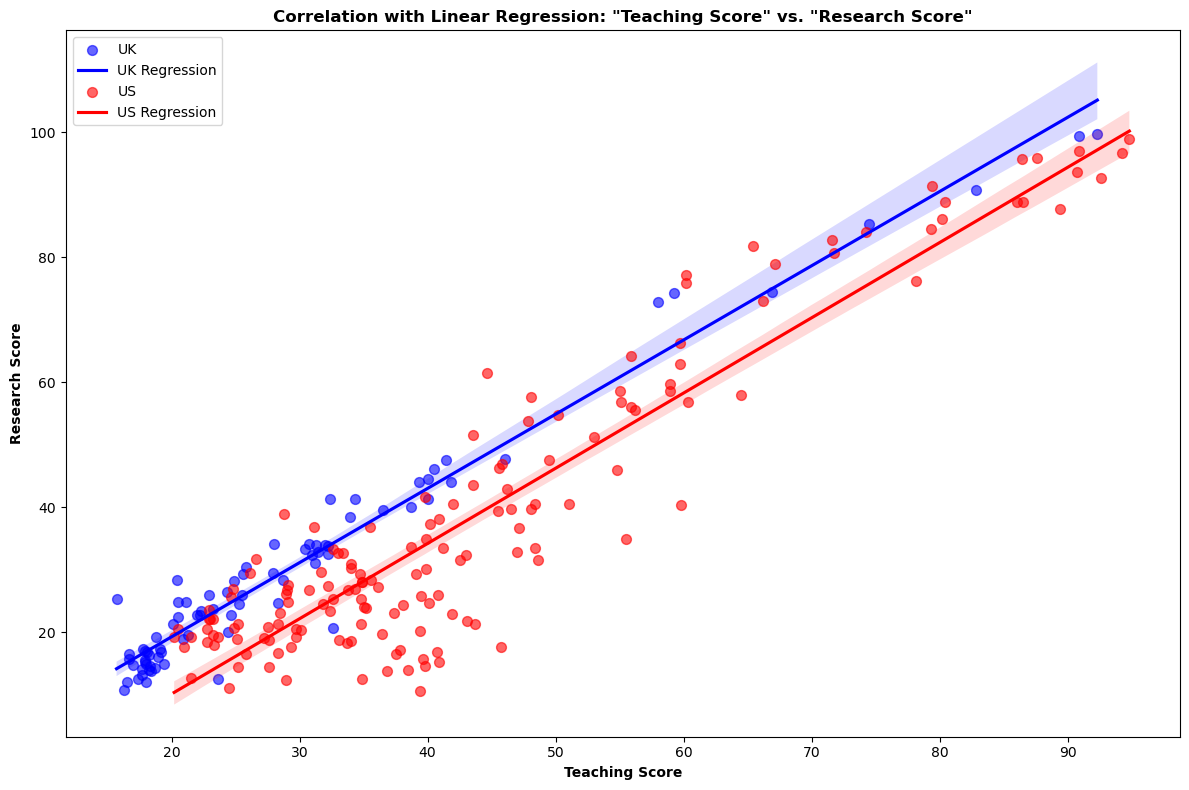

In [209]:
# Scatter plot with linear regression for "Teaching Score" vs. "Research Score" for UK and US Universities
plt.figure(figsize=(12, 8))

# Using seaborn's regplot for UK
sns.regplot(x='Teaching Score', y='Research Score', data=uk_points, scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'blue', 'label':'UK Regression'}, label='UK', color='b')

# Using seaborn's regplot for US
sns.regplot(x='Teaching Score', y='Research Score', data=us_points, scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'red', 'label':'US Regression'}, label='US', color='r')

# Title, labels, and legend
plt.title('Correlation with Linear Regression: "Teaching Score" vs. "Research Score"', fontweight='bold')
plt.xlabel('Teaching Score', fontweight='bold')
plt.ylabel('Research Score', fontweight='bold')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Filtering out universities that aren't in the UK or US
data_for_ml = uk_us_data.copy()

# Drop rows with missing values
data_for_ml.dropna(inplace=True)

# Encoding the 'Location' column (target variable): 1 for 'United Kingdom' and 0 for 'United States'
data_for_ml['Location'] = data_for_ml['Location'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Selecting predictor variables
features = ['Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 
            'International Outlook Score', 'No of student', 'Female Student (Approx)', 
            'Male Student (Approx)', 'International Student (Approx)']

X = data_for_ml[features]
y = data_for_ml['Location']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((185, 9), (47, 9))

In [211]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy


1.0

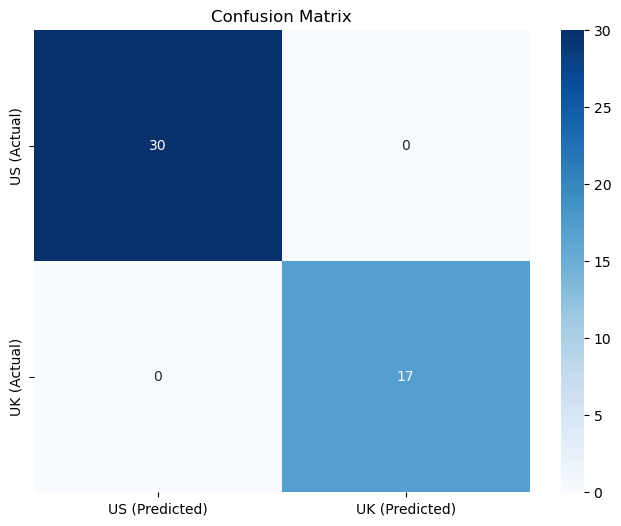

In [212]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['US (Predicted)', 'UK (Predicted)'], 
            yticklabels=['US (Actual)', 'UK (Actual)'])
plt.title('Confusion Matrix')
plt.show()


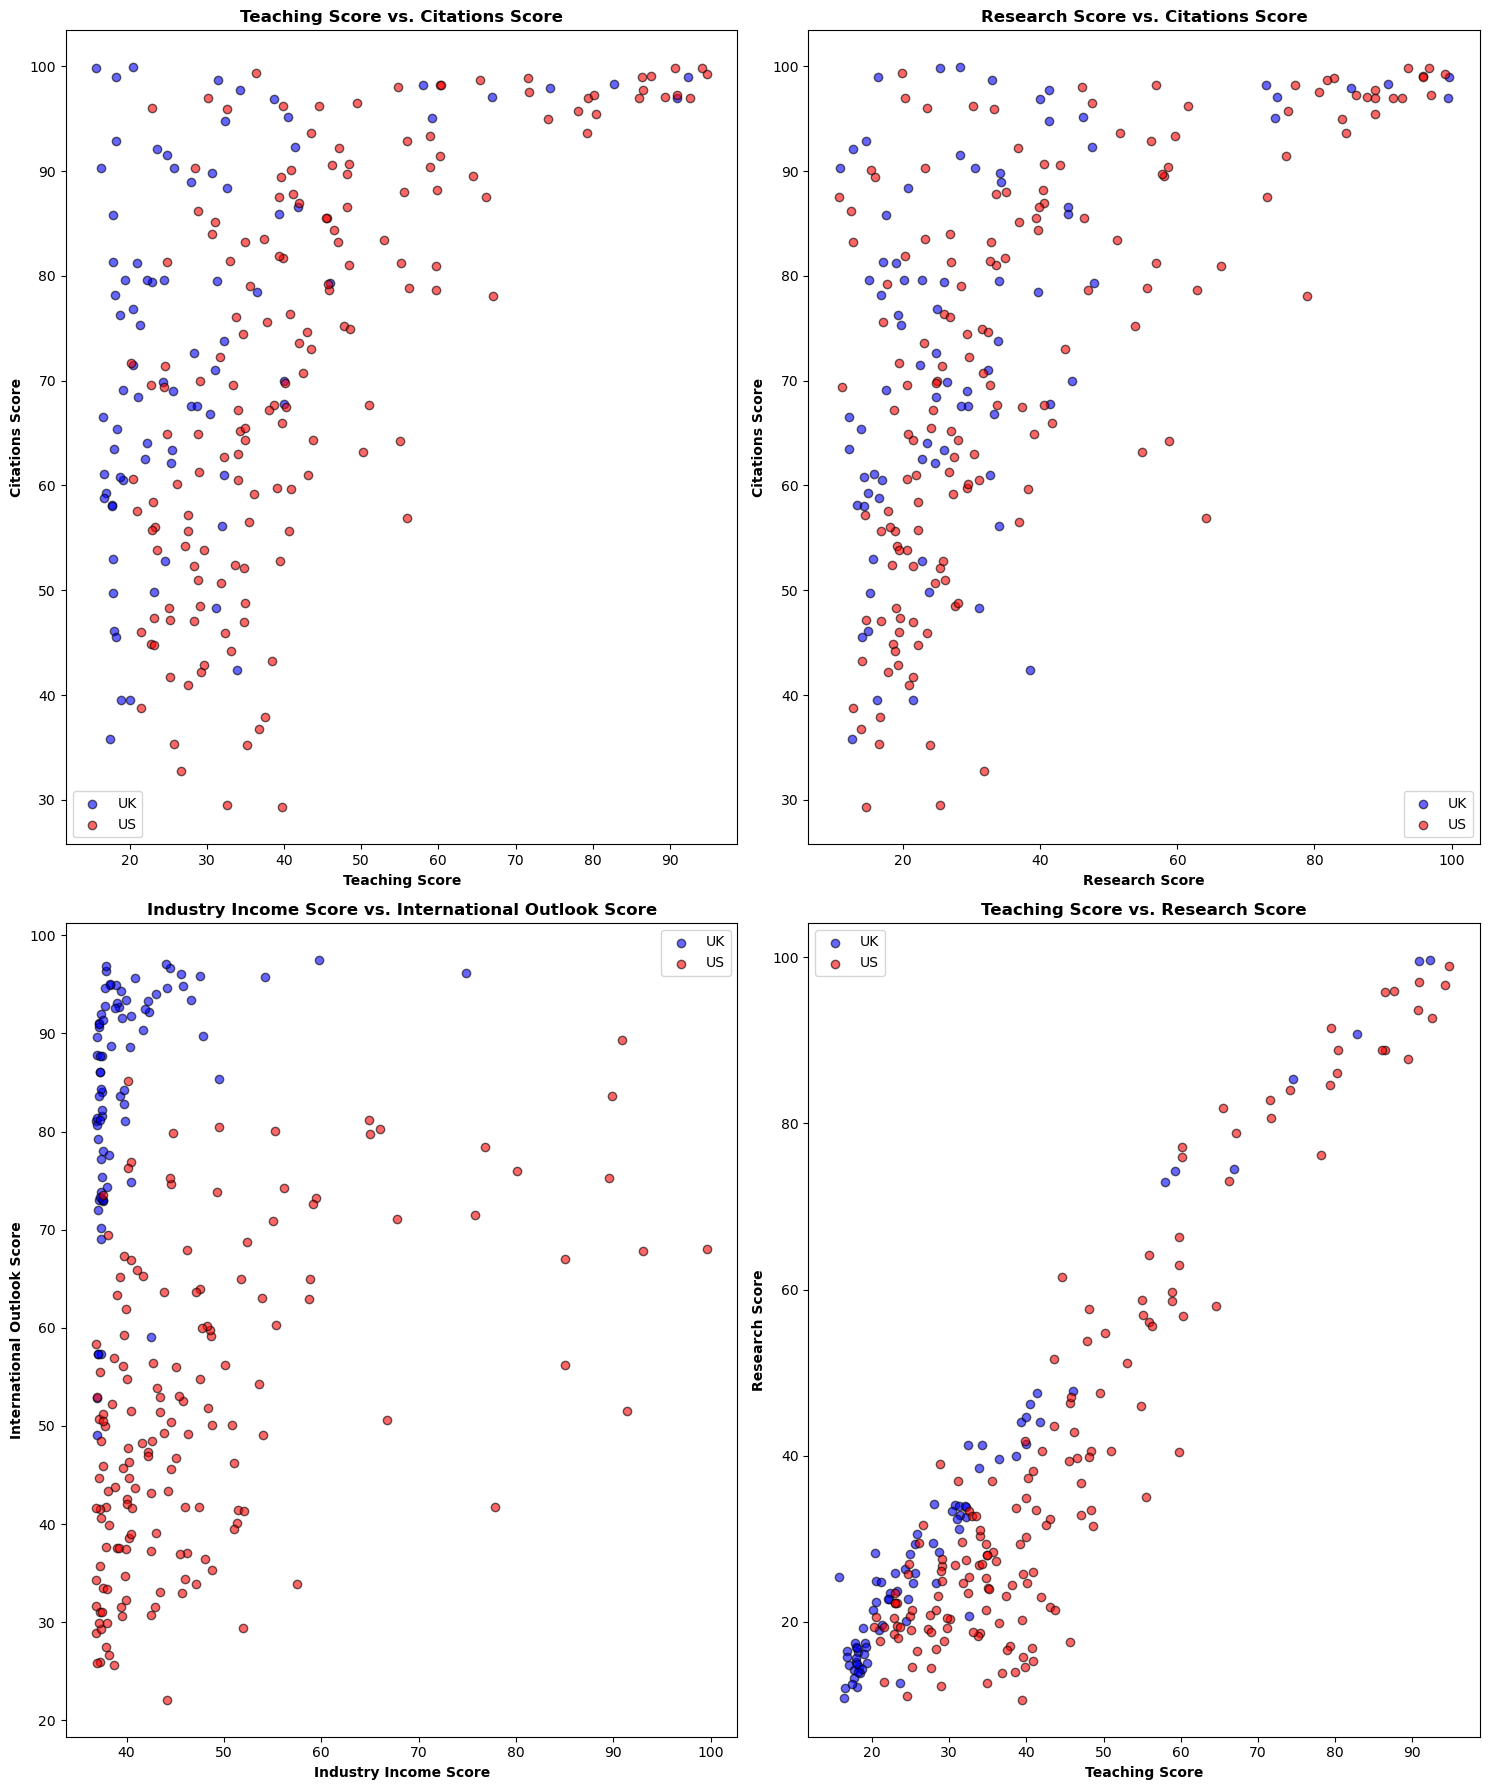

In [213]:
# Set up the figure and axes for multiple scatter plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 18))

# List of variable pairings for scatter plots
variable_pairs = [('Teaching Score', 'Citations Score'),
                  ('Research Score', 'Citations Score'),
                  ('Industry Income Score', 'International Outlook Score'),
                  ('Teaching Score', 'Research Score')]

# Plotting the scatter plots for each variable pairing
for ax, (x_var, y_var) in zip(axs.ravel(), variable_pairs):
    ax.scatter(uk_points[x_var], uk_points[y_var], color='b', alpha=0.6, label='UK', edgecolor='black')
    ax.scatter(us_points[x_var], us_points[y_var], color='r', alpha=0.6, label='US', edgecolor='black')
    ax.set_title(f'{x_var} vs. {y_var}', fontweight='bold')
    ax.set_xlabel(x_var, fontweight='bold')
    ax.set_ylabel(y_var, fontweight='bold')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Teaching Score vs. Citations Score: There seems to be a positive correlation between teaching and citations scores, especially for higher-scoring institutions. This suggests that universities with strong teaching also tend to have significant research impact in terms of citations.

Research Score vs. Citations Score: A strong positive correlation is observed. This is expected since universities with impactful research often have higher citation rates.

Industry Income Score vs. Teaching Score: The relationship here is less linear than the previous plots. Some universities with high teaching scores might not necessarily have high industry income scores.

International Outlook Score vs. Research Score: There's a spread across the plot, but it's interesting to see that universities with a very high international outlook score tend to have varied research scores.

OverAll Score vs. International Outlook Score: There's a general upward trend, especially for the US universities, suggesting that institutions with a higher overall score tend to have a higher international outlook score.

From these scatter plots, we can observe varying degrees of relationships between the different variables. Some exhibit strong linear correlations, while others show more diverse patterns. The plots provide a comprehensive visual insight into how different aspects of university performance relate to one another.

In [214]:
# 4. Extracting the features for clustering
features_for_clustering = ['Teaching Score', 'Research Score', 'Citations Score', 
                           'Industry Income Score', 'International Outlook Score', 
                           'No of student', 'Female Student (Approx)', 
                           'Male Student (Approx)', 'International Student (Approx)']
clustering_dataset_reset = universities_data[features_for_clustering].copy()

# 5. Clean the data
clustering_dataset_reset_cleaned = clustering_dataset_reset.dropna()

# 6. Scale the data
scaler = StandardScaler()
scaled_clustering_data_reset = scaler.fit_transform(clustering_dataset_reset_cleaned)

scaled_clustering_data_reset.shape

(936, 9)

c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

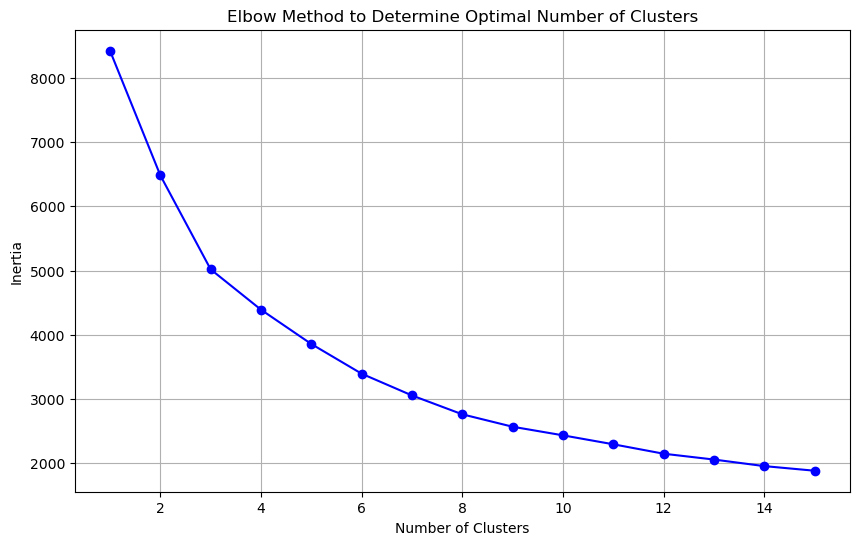

In [215]:
# Determine the optimal number of clusters using the Elbow method
inertia_values = []

# We'll check for up to 15 clusters
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_clustering_data_reset)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inertia_values, 'o-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [216]:
# Extracting the required columns for clustering
cluster_data = universities_data[['Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']]

# Displaying the information and head of the DataFrame
print(cluster_data.info())
print(cluster_data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Teaching Score               999 non-null    float64
 1   Research Score               999 non-null    float64
 2   Citations Score              999 non-null    float64
 3   Industry Income Score        999 non-null    float64
 4   International Outlook Score  999 non-null    float64
dtypes: float64(5)
memory usage: 46.8 KB
None
   Teaching Score  Research Score  Citations Score  Industry Income Score  \
0            92.3            99.7             99.0                   74.9   
1            94.8            99.0             99.3                   49.5   
2            90.9            99.5             97.0                   54.2   
3            94.2            96.7             99.8                   65.0   
4            90.7            93.6             99.8         

In [217]:
# 1. Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# 2. Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 3. Assigning cluster labels back to the original dataset
universities_data['Cluster'] = clusters

# Display the first few rows of the dataset with cluster assignments
universities_data.head(200)


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,...,closed,unaccredited,Female Ratio,Male Ratio,Female Students (%),Male Students (%),Female Student (Approx),Male Student (Approx),International Student (Approx),Cluster
0,1,University of Oxford,United Kingdom,20965.0,10.6,42.0,48 : 52,96.4,92.3,99.7,...,False,False,48,52,48.0,52.0,10063.0,10902.0,8805.0,2
1,2,Harvard University,United States,21887.0,9.6,25.0,50 : 50,95.2,94.8,99.0,...,False,False,50,50,50.0,50.0,10944.0,10944.0,5472.0,2
2,3,University of Cambridge,United Kingdom,20185.0,11.3,39.0,47 : 53,94.8,90.9,99.5,...,False,False,47,53,47.0,53.0,9487.0,10698.0,7872.0,2
3,3,Stanford University,United States,16164.0,7.1,24.0,46 : 54,94.8,94.2,96.7,...,False,False,46,54,46.0,54.0,7435.0,8729.0,3879.0,2
4,5,Massachusetts Institute of Technology,United States,11415.0,8.2,33.0,40 : 60,94.2,90.7,93.6,...,False,False,40,60,40.0,60.0,4566.0,6849.0,3767.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Sichuan University,China,49543.0,15.8,6.0,NaN,54.5,57.1,58.6,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2973.0,2
196,198,Durham University,United Kingdom,18425.0,14.1,35.0,54 : 46,54.4,40.0,44.6,...,False,False,54,46,54.0,46.0,9950.0,8476.0,6449.0,0
197,198,Queen’s University Belfast,NaN,19060.0,15.8,39.0,57 : 43,54.4,31.1,37.9,...,False,False,57,43,57.0,43.0,10864.0,8196.0,7433.0,0
198,198,University of Reading,United Kingdom,15720.0,16.4,32.0,56 : 44,54.4,36.5,39.6,...,False,False,56,44,56.0,44.0,8803.0,6917.0,5030.0,0


In [218]:
print(scaler.inverse_transform(kmeans.cluster_centers_))


[[28.71065831 28.51755486 75.89811912 44.69122257 76.07617555]
 [25.74308943 20.3449187  59.02581301 45.66930894 40.75914634]
 [54.68351064 60.64787234 78.29574468 73.16276596 68.89255319]]


In [219]:
print(universities_data['Cluster'].value_counts())


1    492
0    319
2    188
Name: Cluster, dtype: int64


In [220]:
print(universities_data.groupby('Cluster').mean())


         No of student  No of student per staff  International Student  \
Cluster                                                                  
0         19270.210031                18.962382              22.815047   
1         25058.548780                18.703455               6.788618   
2         26308.968085                17.953723              21.861702   

         Teaching Score  Research Score  Citations Score  \
Cluster                                                    
0             28.710658       28.517555        75.898119   
1             25.743089       20.344919        59.025813   
2             54.683511       60.647872        78.295745   

         Industry Income Score  International Outlook Score  closed  \
Cluster                                                               
0                    44.691223                    76.076176     0.0   
1                    45.669309                    40.759146     0.0   
2                    73.162766              

C:\Users\thoma\AppData\Local\Temp\ipykernel_12944\340153205.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(universities_data.groupby('Cluster').mean())


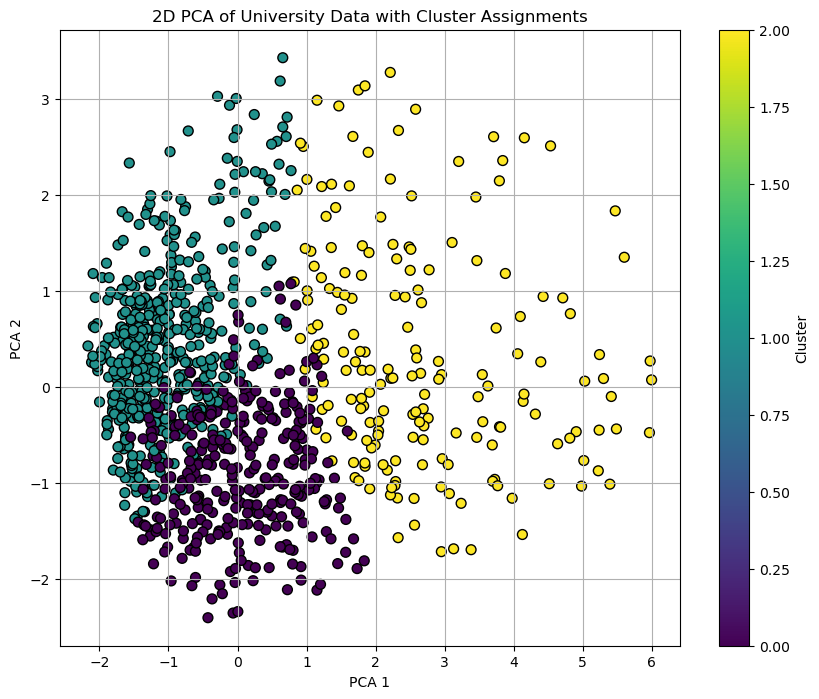

In [221]:

# 1. Applying PCA to reduce the data to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 2. Plotting the 2D PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Cluster')
plt.title('2D PCA of University Data with Cluster Assignments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [222]:
# Group by the cluster labels and compute the mean for each feature
cluster_means = universities_data.groupby('Cluster')[['Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']].mean()

cluster_means


,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
Cluster,,,,,
0,28.710658,28.517555,75.898119,44.691223,76.076176
1,25.743089,20.344919,59.025813,45.669309,40.759146
2,54.683511,60.647872,78.295745,73.162766,68.892553


In [223]:
# Grouping by 'Cluster' and 'Location' and counting the number of universities in each group
location_distribution = universities_data.groupby(['Cluster', 'Location']).size().reset_index(name='Number of Universities')

location_distribution.pivot(index='Location', columns='Cluster', values='Number of Universities').fillna(0)


Cluster,0,1,2
Location,,,
Algeria,0.0,1.0,0.0
Australia,18.0,2.0,5.0
Austria,6.0,1.0,3.0
Bangladesh,0.0,2.0,0.0
Belgium,4.0,1.0,4.0
...,...,...,...
United Arab Emirates,4.0,0.0,0.0
United Kingdom,65.0,8.0,7.0
United States,32.0,78.0,47.0


In [224]:
# Drop duplicate universities
universities_df = universities_data.drop_duplicates(subset='Name of University')

# Group by Cluster and Location, then count universities
cluster_location_counts = universities_df.groupby(['Cluster', 'Location']).size().reset_index(name='Counts')

# Display the results
print(cluster_location_counts)


     Cluster           Location  Counts
0          0          Australia      18
1          0            Austria       6
2          0            Belgium       4
3          0  Brunei Darussalam       1
4          0             Canada      10
..       ...                ...     ...
124        2        Switzerland       6
125        2             Taiwan       3
126        2             Turkey       2
127        2     United Kingdom       7
128        2      United States      47

[129 rows x 3 columns]


In [225]:
# For example, to see the countries in Cluster 0:
print(cluster_location_counts[cluster_location_counts['Cluster'] == 0])


    Cluster              Location  Counts
0         0             Australia      18
1         0               Austria       6
2         0               Belgium       4
3         0     Brunei Darussalam       1
4         0                Canada      10
5         0                 China       1
6         0                Cyprus       1
7         0               Denmark       3
8         0                 Egypt       2
9         0               Finland       4
10        0                France      12
11        0               Germany      14
12        0                Greece       1
13        0             Hong Kong       1
14        0               Iceland       2
15        0                 India       1
16        0               Ireland       5
17        0                Israel       3
18        0                 Italy       8
19        0               Jamaica       1
20        0                 Japan       1
21        0                Jordan       1
22        0                Latvia 

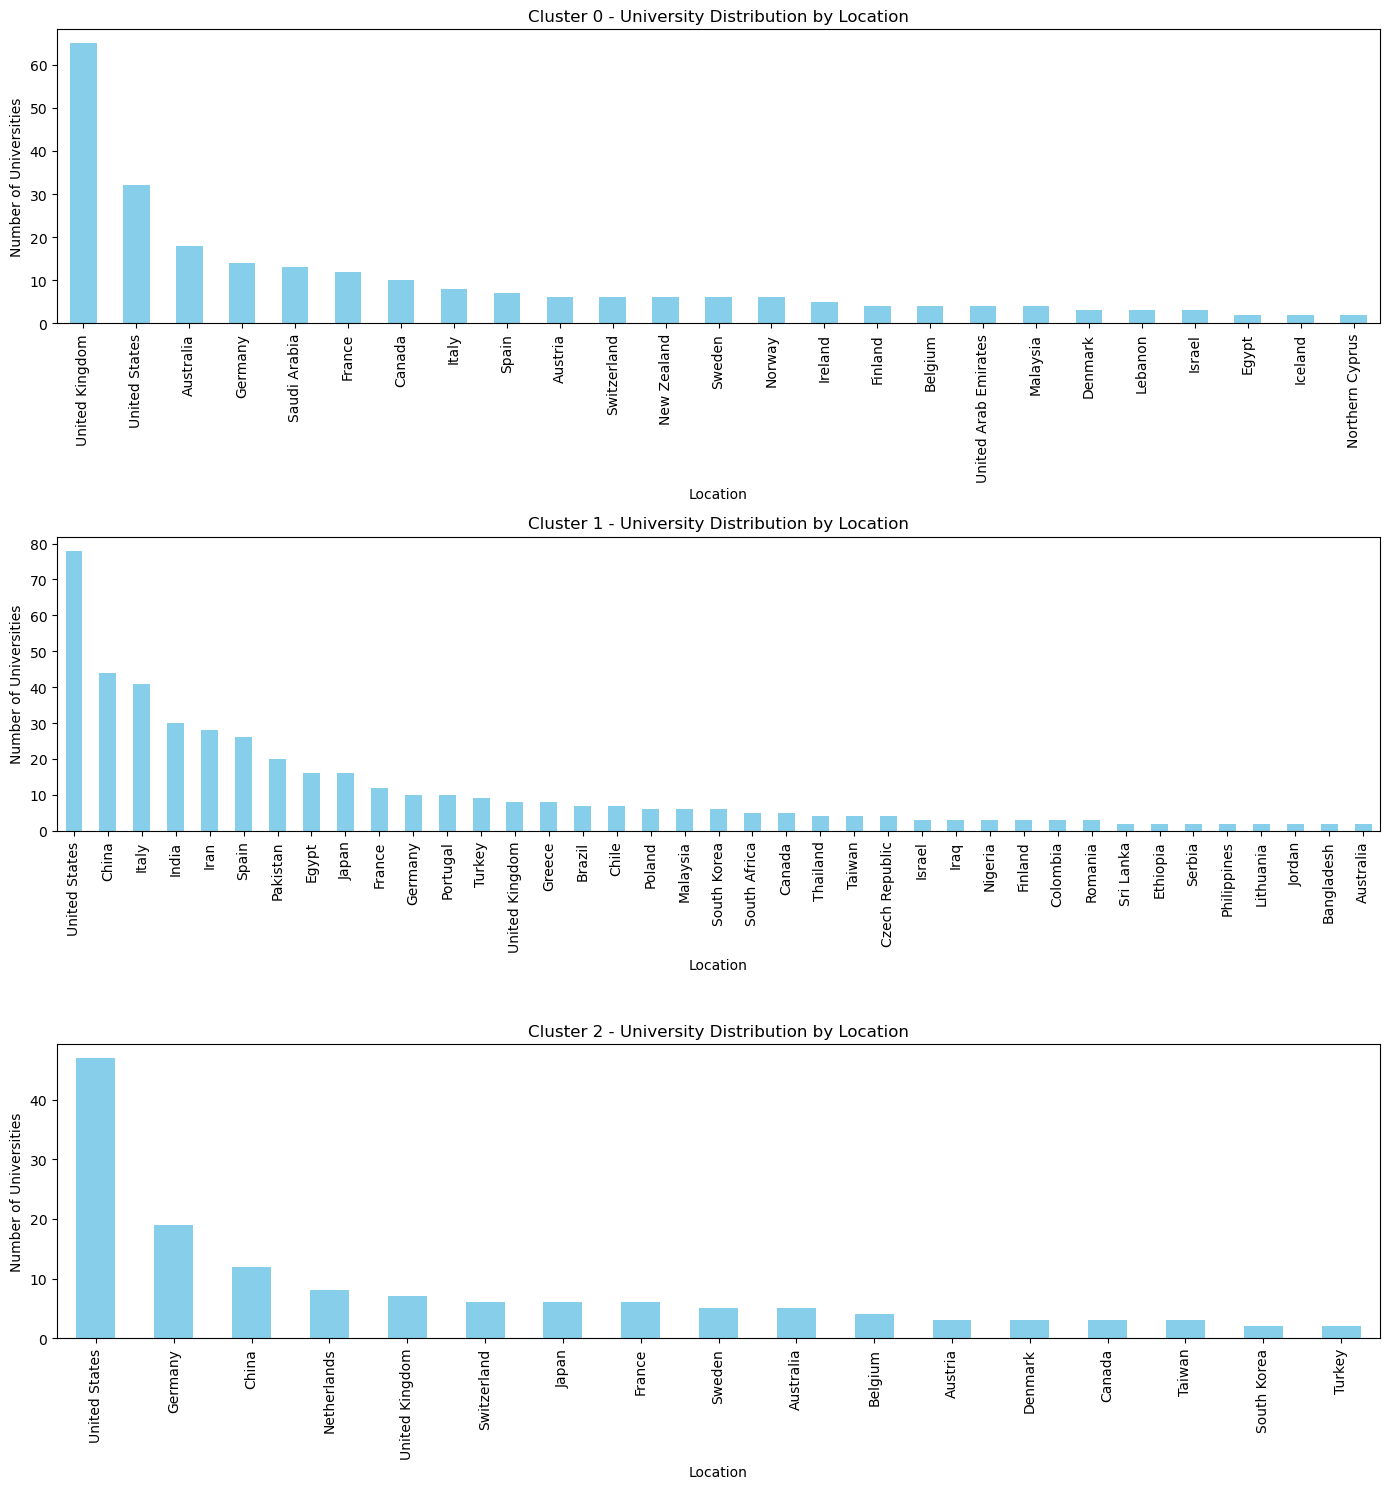

In [226]:
# Group by 'Location' and 'Cluster' and count the number of universities in each group
location_cluster_counts = universities_data.groupby(['Location', 'Cluster']).size().unstack(fill_value=0)

# Create subplots for each cluster
fig, axes = plt.subplots(nrows=3, figsize=(14, 15))

# Loop through each cluster and plot the bar chart for locations with more than one university
for cluster in range(3):
    # Filter data for the current cluster and locations with more than one university
    cluster_data = location_cluster_counts[cluster]
    cluster_data = cluster_data[cluster_data > 1]
    
    # Sort the data for better visualization
    cluster_data = cluster_data.sort_values(ascending=False)
    
    # Plotting
    cluster_data.plot(kind='bar', ax=axes[cluster], color='skyblue')
    axes[cluster].set_title(f'Cluster {cluster} - University Distribution by Location')
    axes[cluster].set_ylabel('Number of Universities')
    axes[cluster].set_xlabel('Location')

# Adjust the layout
plt.tight_layout()
plt.show()


Cluster
0    76.076176
1    40.759146
2    68.892553
Name: International Outlook Score, dtype: float64


<Axes: xlabel='Cluster', ylabel='International Outlook Score'>

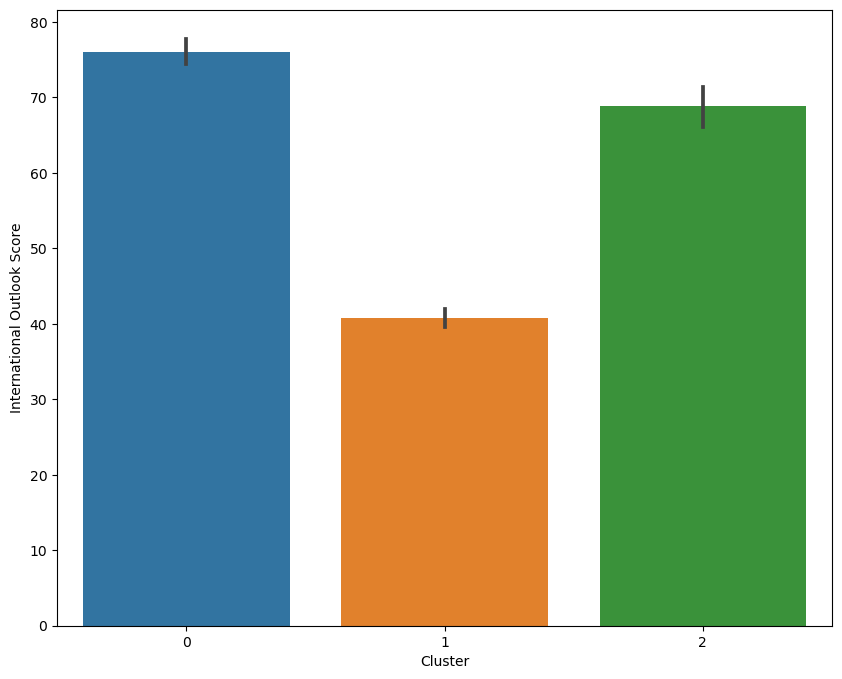

In [227]:
cluster_intl_outlook_mean = universities_data.groupby('Cluster')['International Outlook Score'].mean()
print(cluster_intl_outlook_mean)

plt.figure(figsize=(10, 8))
sns.barplot(x='Cluster', y='International Outlook Score', data=universities_data)


In [228]:



# Check the first few rows of the DataFrame
universities_data['subjects_offered'].value_counts()

[Medicine & Dentistry, Other Health]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   11
[Other Health, Medicine & Dentistry]                                                                                                                                                                                                                                                                                                                          